#### **ANÁLISE EXPLORATÓRIA DE DADOS** 
#### CASE “LE CHOCOLAT”
USJT Mooca Noite

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df = pd.read_csv("../data/chocolate.csv")

#### **Primeiramente vamos realizar uma análise exploratória**
Com o objetivo de conhecer os dados que possuimos

In [84]:
df.head(10)

,Company \r\n(Maker-if known),Specific Bean Origin\r\nor Bar Name,REF,Review\r\nDate,Cocoa\r\nPercent,Company\r\nLocation,Rating,Bean\r\nType,Broad Bean\r\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


In [85]:
print(f"Colunas {df.shape[1]}, Linhas {df.shape[0]}")

Colunas 9, Linhas 1795


In [86]:
# Removendo valores duplicados

df.drop_duplicates(inplace=True)

In [87]:
# Limpando o nome das colunas
df.columns = df.columns.str.replace("\r\n", "")
df.columns

Index(['Company (Maker-if known)', 'Specific Bean Originor Bar Name', 'REF',
       'ReviewDate', 'CocoaPercent', 'CompanyLocation', 'Rating', 'BeanType',
       'Broad BeanOrigin'],
      dtype='object')

In [88]:
# Resumo estatístico dos dados
df.describe()

,REF,ReviewDate,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


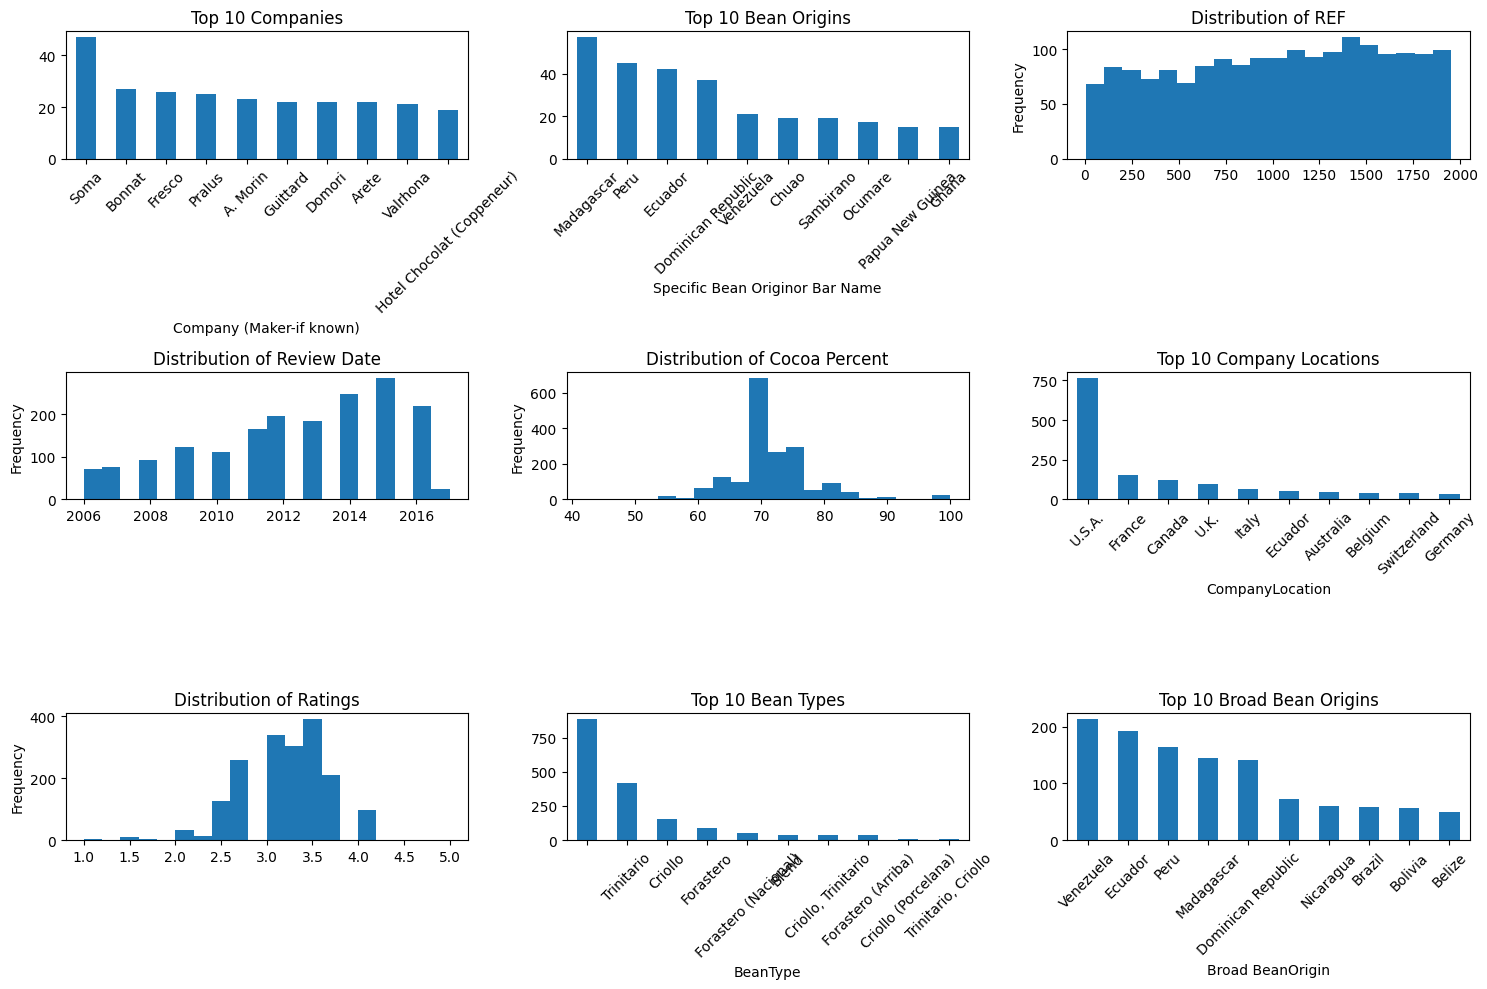

In [89]:
plt.figure(figsize=(15, 10))

# Gráfico de barras para 'Company (Maker-if known)'
plt.subplot(3, 3, 1)
df['Company (Maker-if known)'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Companies')
plt.xticks(rotation=45)

# Gráfico de barras para 'Specific Bean Originor Bar Name'
plt.subplot(3, 3, 2)
df['Specific Bean Originor Bar Name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Bean Origins')
plt.xticks(rotation=45)

# Histograma para 'REF'
plt.subplot(3, 3, 3)
df['REF'].plot(kind='hist', bins=20)
plt.title('Distribution of REF')

# Histograma para 'ReviewDate'
plt.subplot(3, 3, 4)
df['ReviewDate'].plot(kind='hist', bins=20)
plt.title('Distribution of Review Date')

# Histograma para 'CocoaPercent'
plt.subplot(3, 3, 5)
df['CocoaPercent'] = df['CocoaPercent'].str.replace('%', '').astype(float)
df['CocoaPercent'].plot(kind='hist', bins=20)
plt.title('Distribution of Cocoa Percent')

# Gráfico de barras para 'CompanyLocation'
plt.subplot(3, 3, 6)
df['CompanyLocation'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Company Locations')
plt.xticks(rotation=45)

# Histograma para 'Rating'
plt.subplot(3, 3, 7)
df['Rating'].plot(kind='hist', bins=20)
plt.title('Distribution of Ratings')

# Gráfico de barras para 'BeanType'
plt.subplot(3, 3, 8)
df['BeanType'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Bean Types')
plt.xticks(rotation=45)

# Gráfico de barras para 'Broad BeanOrigin'
plt.subplot(3, 3, 9)
df['Broad BeanOrigin'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Broad Bean Origins')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Perguntas a serem respondidas

1) Qual país é o maior produtor de chocolate?
2) Como a porcentagem de cacau nos chocolates afeta as avaliações?
3) Como varia a produção de chocolate de acordo com o tipo (normal ou escuro).
4) Qual país tem as classificações de chocolate mais altas?
5) Como as classificações dos diferentes tipos de chocolate mudam ao longo do
tempo?

### **Pergunta 1**

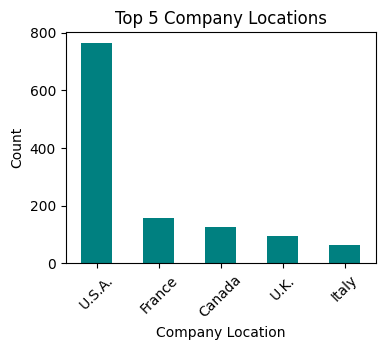

A top 1 CompanyLocation é: U.S.A.


In [90]:
# Contagem das 5 principais CompanyLocation
top_5_locations = df['CompanyLocation'].value_counts().head(5)

# Gráfico de barras
plt.figure(figsize=(4, 3))
top_5_locations.plot(kind='bar', color='teal')
plt.title('Top 5 Company Locations')
plt.xlabel('Company Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

top_1_location = top_5_locations.idxmax()
print(f"A top 1 CompanyLocation é: {top_1_location}")

### **Pergunta 2**

In [91]:
df["Rating"].value_counts(ascending=True)

Rating
5.00      2
1.75      3
1.00      4
1.50     10
2.25     14
2.00     32
4.00     98
2.50    127
3.75    210
2.75    259
3.25    303
3.00    341
3.50    392
Name: count, dtype: int64

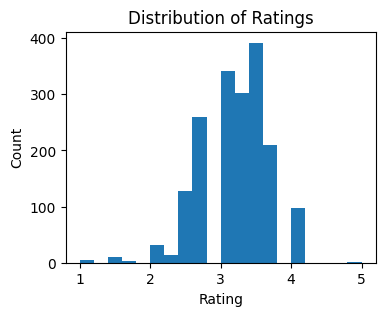

In [92]:
# Primeiramente vamos avaliar como estão distribuídas as avaliações
plt.figure(figsize=(4, 3))
df['Rating'].plot(kind='hist', bins=20)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

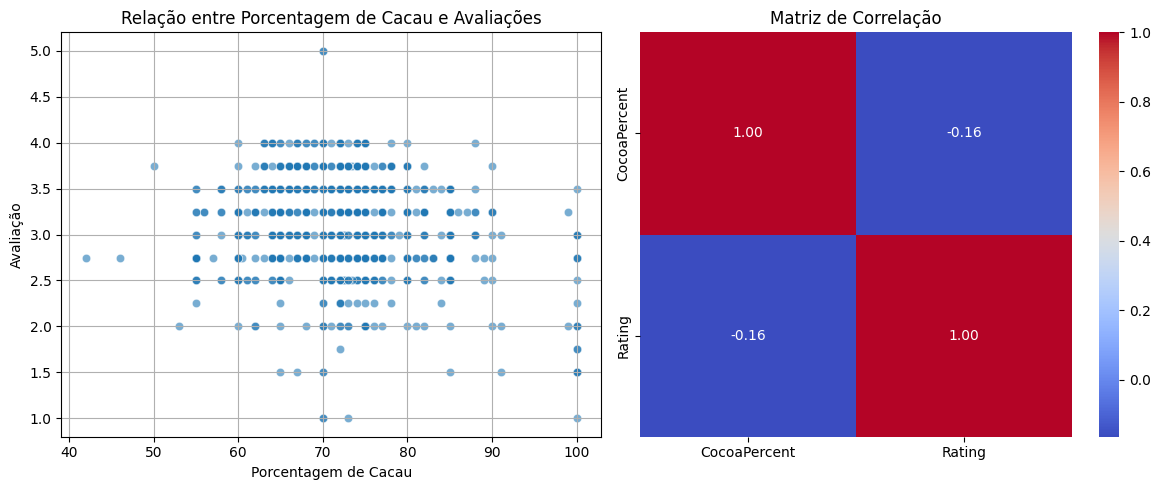

In [93]:
# Configurando o tamanho da figura
plt.figure(figsize=(12, 5))

# Scatterplot
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='CocoaPercent', y='Rating', alpha=0.6)
plt.title('Relação entre Porcentagem de Cacau e Avaliações')
plt.xlabel('Porcentagem de Cacau')
plt.ylabel('Avaliação')
plt.grid(True)

# Matriz de correlação
plt.subplot(1, 2, 2)
correlation_matrix = df[['CocoaPercent', 'Rating']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')

plt.tight_layout()
plt.show()

Com base no Scatterplot e a matriz de correlação (pearson), é possível concluir que não há correlação entre porcentagem de cacau, pois o coeficiente é próximo de 0, o que indica que é estatísticamente insignificante

## **Pergunta 3**

In [95]:
# Utilizando uma função lambda para classificar os tipos de chocolate
df['Chocolate Type'] = df['CocoaPercent'].apply(lambda x: 'Dark' if x >= 70 else 'Normal')

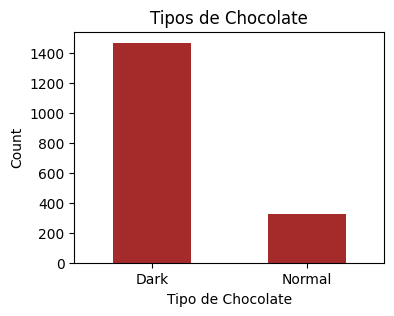

In [96]:
plt.figure(figsize=(4, 3))
df['Chocolate Type'].value_counts().plot(kind='bar', color='brown')
plt.title('Tipos de Chocolate')
plt.xlabel('Tipo de Chocolate')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

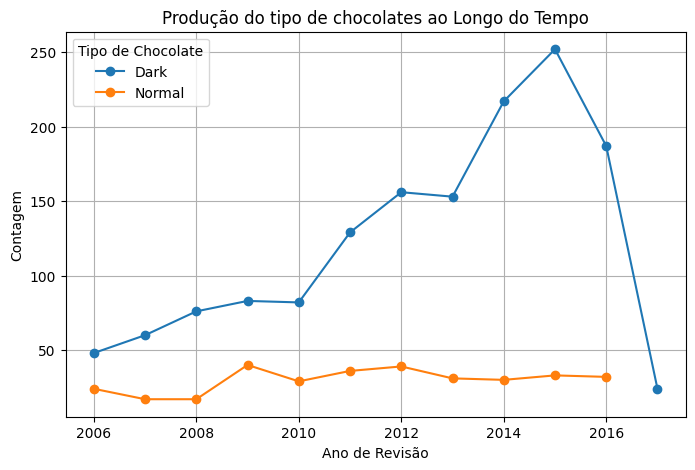

In [101]:
chocolate_type_counts = df.groupby(['ReviewDate', 'Chocolate Type']).size().unstack()

chocolate_type_counts.plot(kind='line', figsize=(8, 5), marker='o')
plt.title('Produção do tipo de chocolates ao Longo do Tempo')
plt.xlabel('Ano de Revisão')
plt.ylabel('Contagem')
plt.grid(True)
plt.legend(title='Tipo de Chocolate')
plt.show()

### **Pergunta 4**

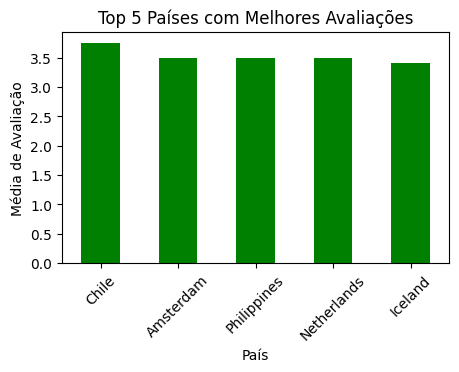

In [97]:
# Calculando a média das avaliações por país
avg_rating_by_country = df.groupby('CompanyLocation')['Rating'].mean().sort_values(ascending=False)

top_countries_by_rating = avg_rating_by_country.head(5)
plt.figure(figsize=(5, 3))
top_countries_by_rating.plot(kind='bar', color='green')
plt.title('Top 5 Países com Melhores Avaliações')
plt.xlabel('País')
plt.ylabel('Média de Avaliação')
plt.xticks(rotation=45)
plt.show()

O chile é o país com as melhores avaliações

### **Pergunta 5**

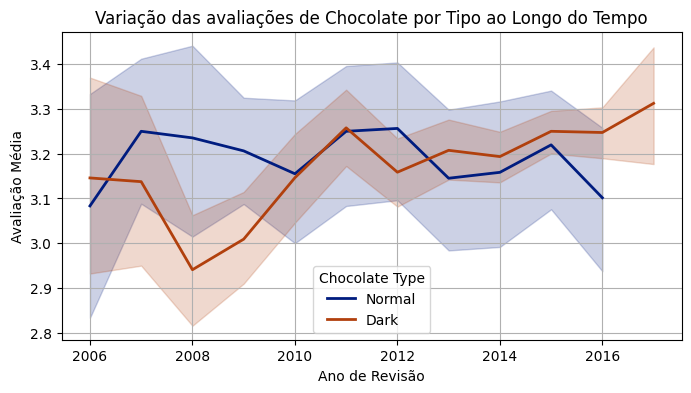

In [98]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x='ReviewDate', y='Rating', hue='Chocolate Type', palette='dark', linewidth=2)
plt.title('Variação das avaliações de Chocolate por Tipo ao Longo do Tempo')
plt.xlabel('Ano de Revisão')
plt.ylabel('Avaliação Média')
plt.grid(True)
plt.show()